In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# LAB 1

## Creation of the graph (without occupancy)

In [2]:
nodes = pd.read_csv('Documentation/nodes.csv', header=None, index_col=0, names=["Node","x_position","y_position"])
edges = pd.read_csv('Documentation/links.csv', header=None, names=[
    "Link ID", 
    "Length (m)",
    "Number of lanes", 
    "Starting node ID",
    "Ending node ID", 
    "Region"], index_col=0)
print(nodes.head(5),"\n", edges.head(5))



      x_position  y_position
Node                        
1         429948     4581385
2         431582     4580937
3         432524     4583069
4         432650     4582536
5         432645     4582410 
          Length (m)  Number of lanes  Starting node ID  Ending node ID  Region
Link ID                                                                       
512      109.223913                3             21109           19069       4
513      129.668254                3             19067           21109       4
514      133.572478                2             19065           21042       4
516       47.649608                2                11           19201       3
593       96.553539                3             18703              84       4


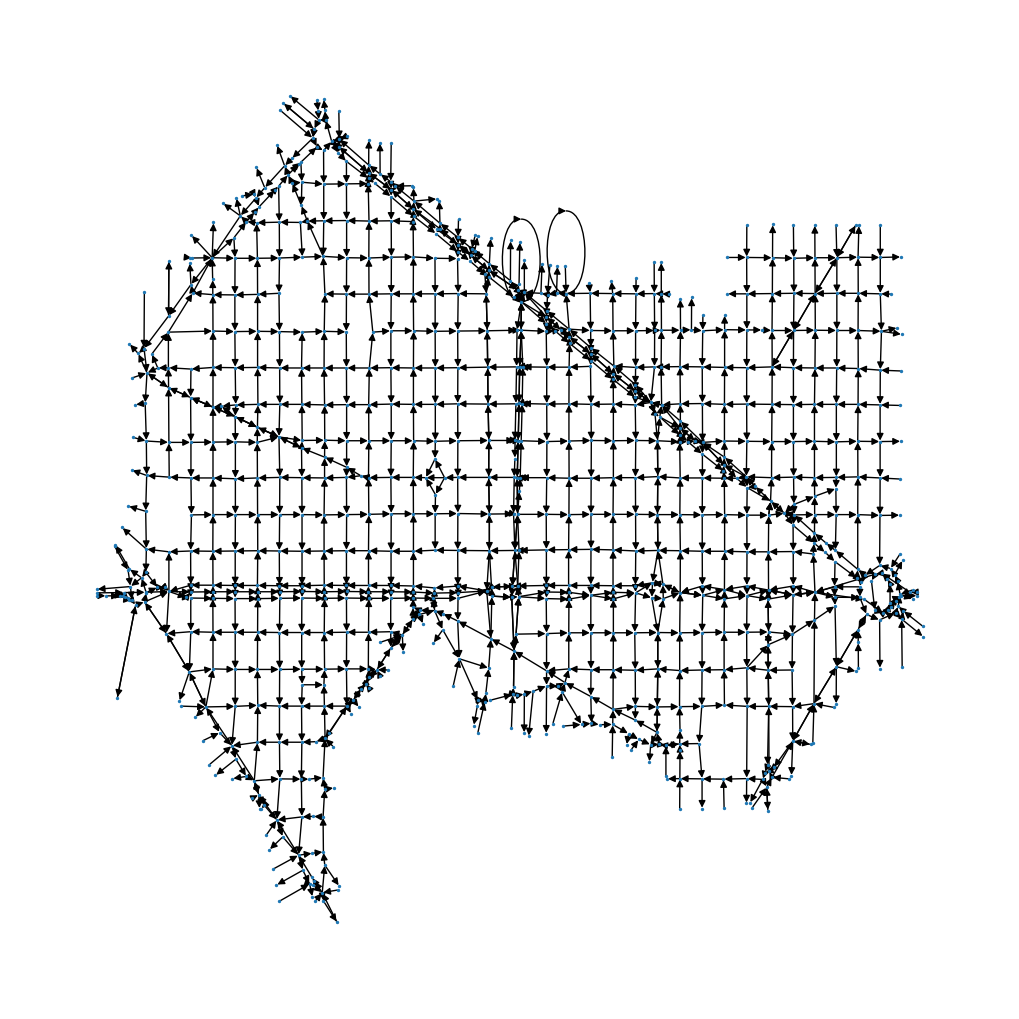

In [3]:
G = nx.from_pandas_edgelist(edges, 
                            source = "Starting node ID", 
                            target= "Ending node ID", 
                            edge_attr=["Length (m)", "Number of lanes", "Region"],
                            create_using=nx.MultiDiGraph)
plt.figure(figsize=(10,10))
nx.draw(G, node_size = 2, pos=nodes.transpose())
plt.show()

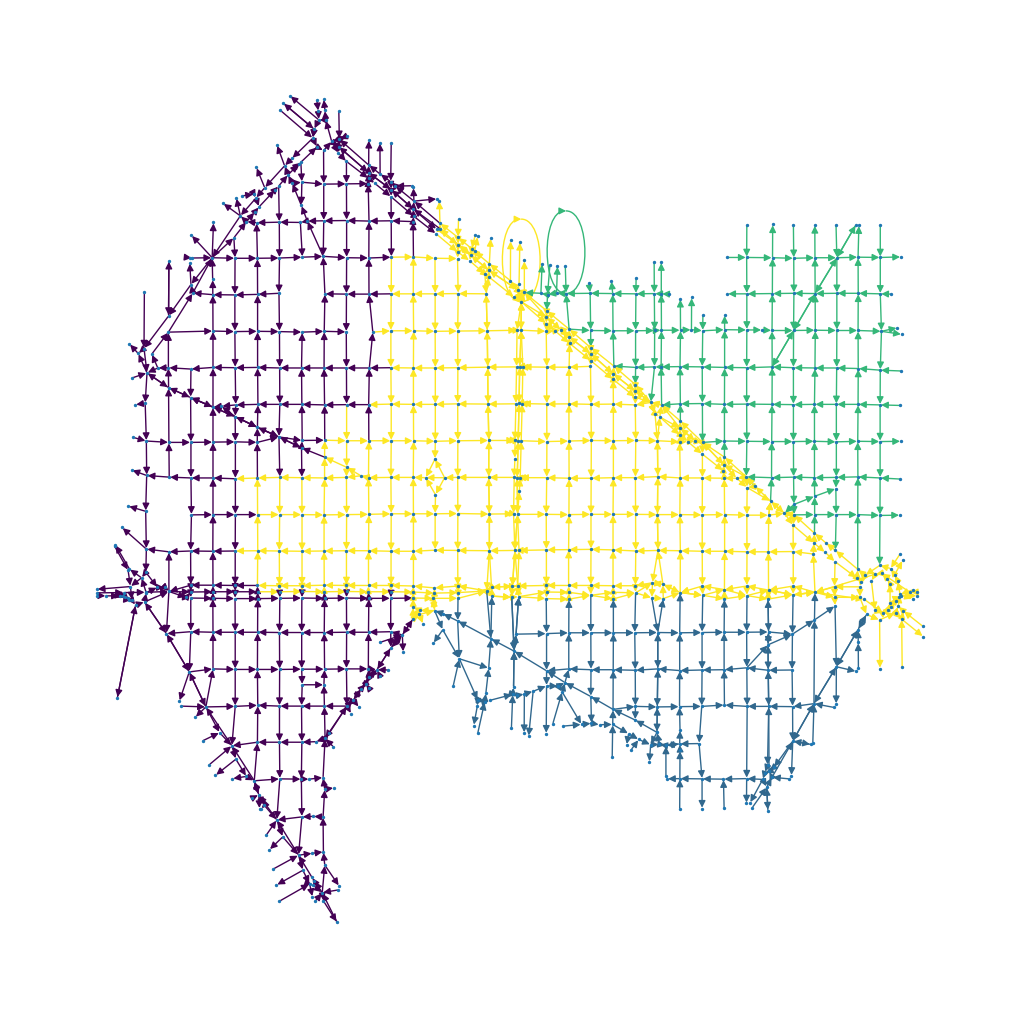

In [4]:
G = nx.from_pandas_edgelist(edges, 
                            source = "Starting node ID", 
                            target= "Ending node ID", 
                            edge_attr=["Length (m)", "Number of lanes", "Region"],
                            create_using=nx.MultiDiGraph)
plt.figure(figsize=(10,10))
nx.draw(G, node_size = 2, pos=nodes.transpose(), edge_color = list(nx.get_edge_attributes(G,"Region").values()))
plt.savefig("Pictures/Network_Regions.png")
plt.show()

## Adding occupancy

In [5]:
occupancy = pd.read_csv('Documentation/occupancy.csv', index_col = 0)

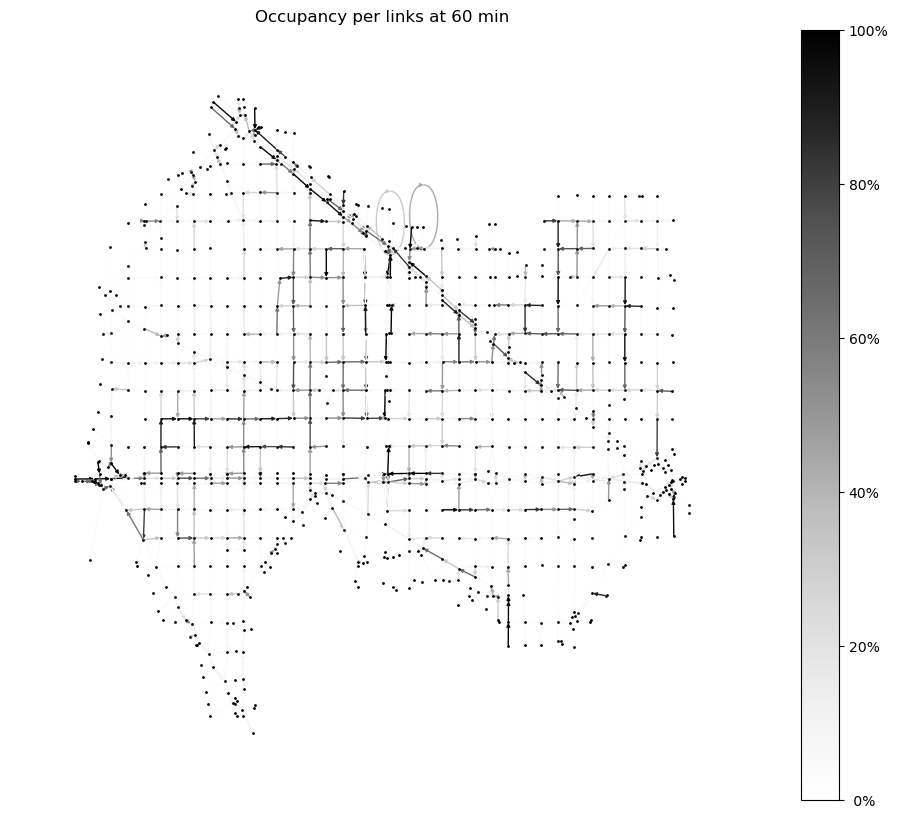

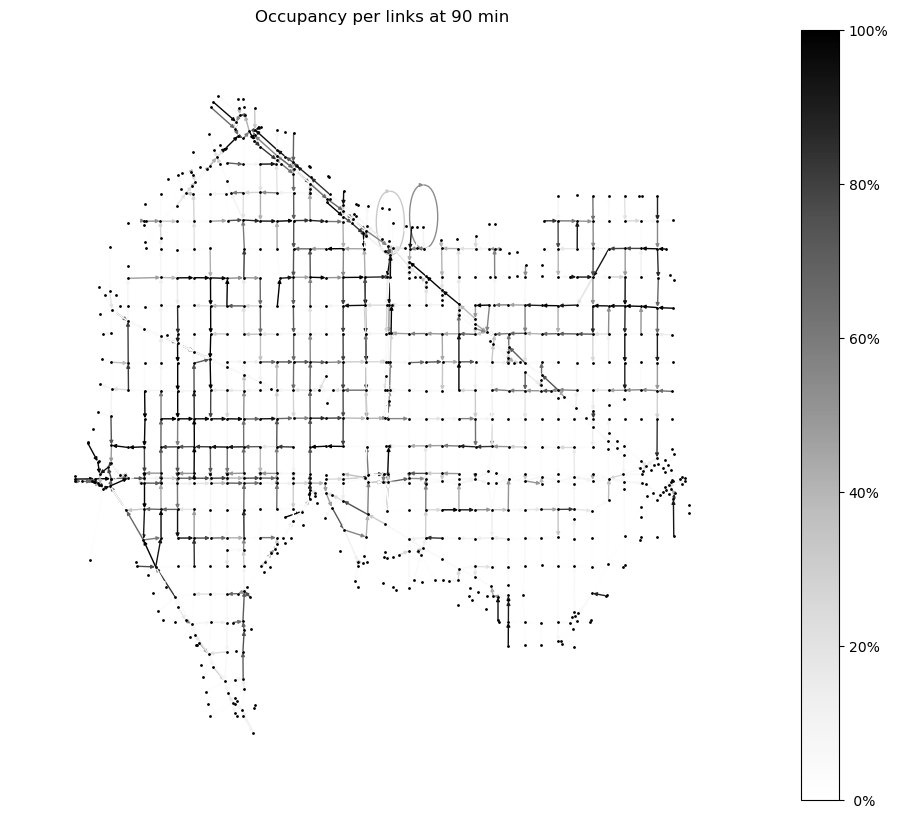

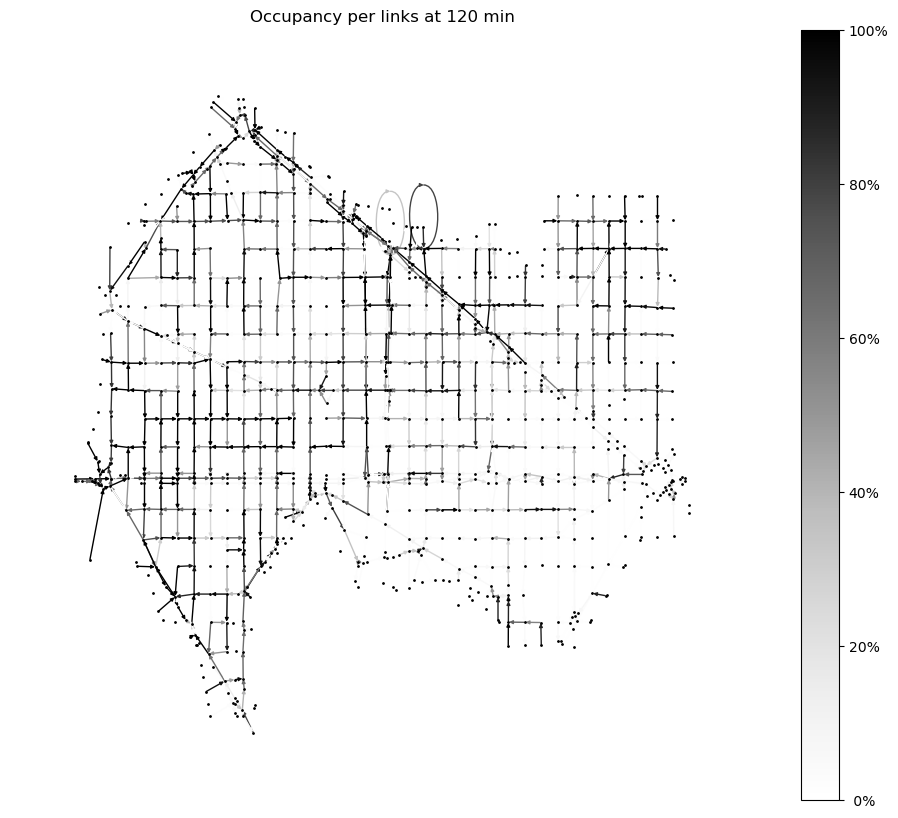

In [6]:
def plot_occupancy_at_t (time_in_minutes):
    time = time_in_minutes * 60
    occupancy_at_t = occupancy.loc[time]
    occupancy_at_t.name = "Occupancy"
    occupancy_at_t.index = occupancy_at_t.index.astype("int")
    edges_at_t = pd.concat((edges, occupancy_at_t),axis=1).copy(deep=True)

    G = nx.from_pandas_edgelist(edges_at_t, 
                                create_using = nx.MultiDiGraph, 
                                source = "Starting node ID", 
                                target= "Ending node ID", 
                                edge_attr=["Length (m)", "Number of lanes", "Region","Occupancy"])

    # Create a colormap
    cmap = plt.get_cmap('Greys')

    # Plotting
    fig, ax = plt.subplots(figsize=(12, 10))
    plt.title(f"Occupancy per links at {time_in_minutes} min")
    nx.draw(G, node_color="0", arrowsize=5, node_size=1, pos=nodes.transpose(), edge_cmap=cmap, edge_color=list(nx.get_edge_attributes(G,"Occupancy").values()), ax=ax)

    # Create the ScalarMappable
    sm = plt.cm.ScalarMappable(mcolors.Normalize(vmin = 0, vmax=100), cmap=cmap)

    # Add the colorbar
    cbar = plt.colorbar(sm, ax=ax, format="%2d%%")

for t in [60, 90, 120] :
    plot_occupancy_at_t(t)
    plt.savefig(f"Pictures/Gray_Scale_{t}min.png")
    plt.show()

## Step 2

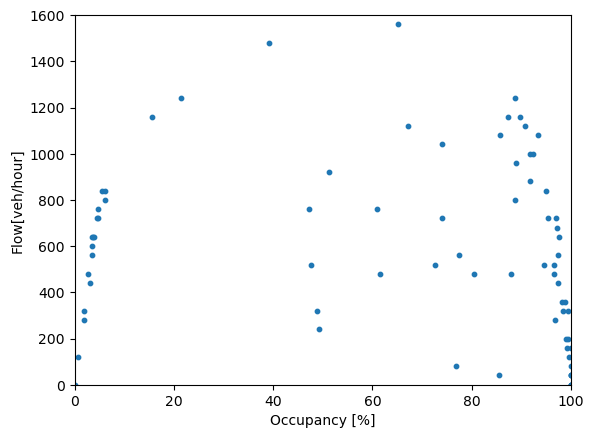

In [7]:
flow = pd.read_csv('Documentation/flow.csv', index_col = 0)

number_link = 514

flow_l = flow.loc[:, f'{number_link}']*3600/90
occpuancy_single_road = occupancy.loc[:, f'{number_link}']
#print(flow_l)
#print(flow.shape)
#print(occpuancy_single_road.shape)

plt.scatter(occpuancy_single_road, flow_l, s=10)
plt.xlabel("Occupancy [%]")
plt.ylabel("Flow[veh/hour]")
plt.xlim(0, 100)
plt.ylim(0,1600)
plt.show()



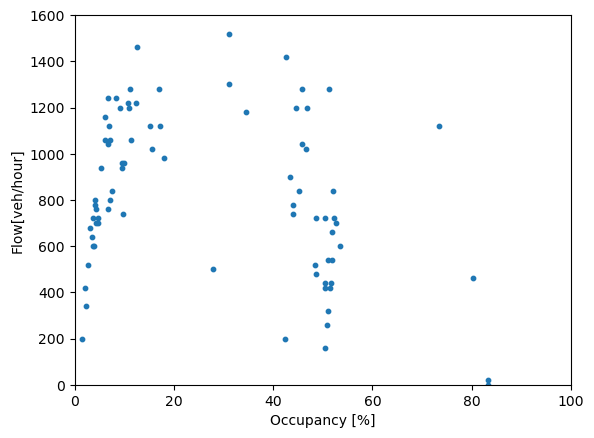

In [8]:
number_link = [516, 512]

        
flow_l= flow[[f'{number_link[0]}', f'{number_link[1]}']]

flow_mean = flow_l.mean(axis=1)*3600/90

occupancy_l = occupancy[[f'{number_link[0]}', f'{number_link[1]}']]
occupancy_mean = occupancy_l.mean(axis=1)

plt.scatter(occupancy_mean, flow_mean, s=10)   
plt.xlabel("Occupancy [%]")
plt.ylabel("Flow[veh/hour]") 
plt.xlim(0, 100)
plt.ylim(0,1600)
plt.show()


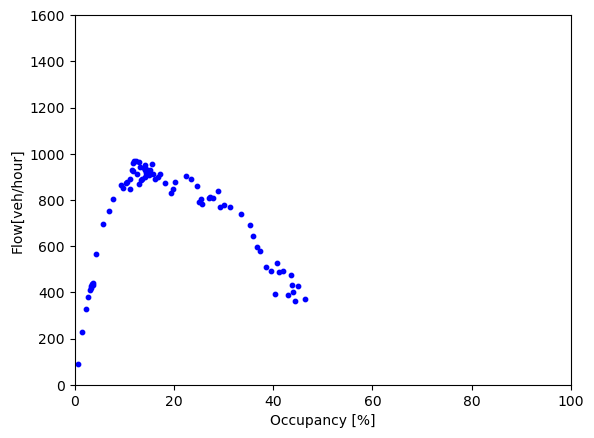

In [9]:
region = 1

number_link = []

for index in edges.index:
    if edges.loc[index]["Region"] == region:
        number_link.append(str(index))
       
flow_l= flow[number_link]
flow_mean = flow_l.mean(axis=1)*3600/90

occupancy_l = occupancy[number_link]
occupancy_mean = occupancy_l.mean(axis=1)

plt.scatter(occupancy_mean, flow_mean, s=10, c="Blue")   
plt.xlabel("Occupancy [%]")
plt.ylabel("Flow[veh/hour]")
plt.xlim(0, 100)
plt.ylim(0,1600)
plt.show()

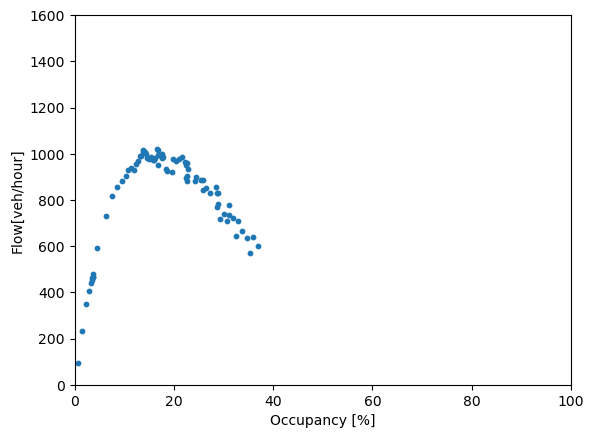

In [10]:
number_link = []

for index in edges.index:
    
    number_link.append(str(index))

flow_l= flow[number_link]
flow_mean = flow_l.mean(axis=1)*3600/90

occupancy_l = occupancy[number_link]
occupancy_mean = occupancy_l.mean(axis=1)

plt.scatter(occupancy_mean, flow_mean, s=10)   
plt.xlabel("Occupancy [%]")
plt.ylabel("Flow[veh/hour]")
plt.xlim(0, 100)
plt.ylim(0,1600)
    
    

plt.show()

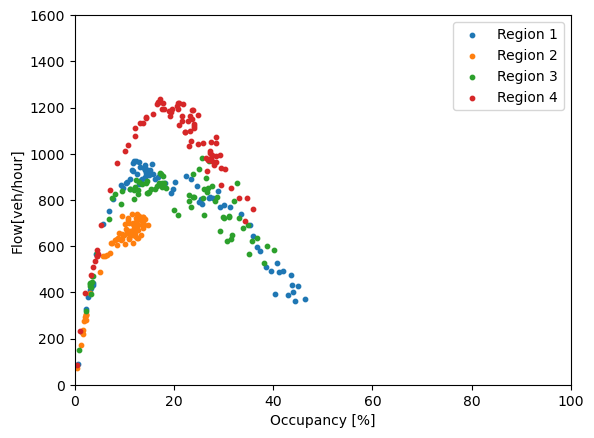

In [11]:
Region = [1,2,3,4]

for region in Region:

    number_link = []

    for index in edges.index:
        if edges.loc[index]["Region"] == region:
            number_link.append(str(index))
        
    flow_l= flow[number_link]
    flow_mean = flow_l.mean(axis=1)*3600/90

    occupancy_l = occupancy[number_link]
    occupancy_mean = occupancy_l.mean(axis=1)

    plt.scatter(occupancy_mean, flow_mean, label=f'Region {region}', s= 10)   
    plt.xlabel("Occupancy [%]")
    plt.ylabel("Flow[veh/hour]")
    plt.xlim(0, 100)
    plt.ylim(0,1600)

plt.legend()
plt.show()

## Step 3

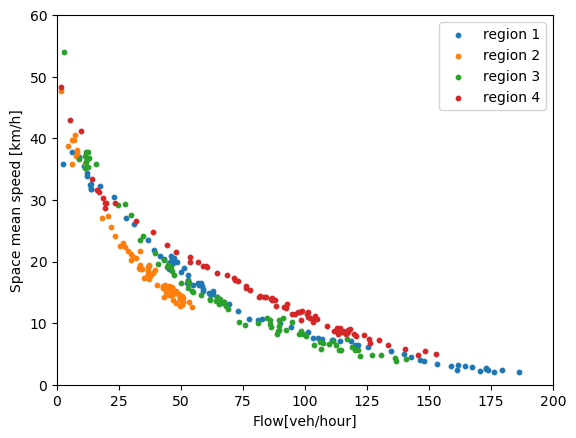

In [12]:
Region = [1,2,3,4]

for region in Region:


    number_link_int = []
    number_link_str = []

    L = 5/1000
    Ld = 2/1000

    for index in edges.index:
        if edges.loc[index]["Region"] == region:
            number_link_int.append(int(index))
            number_link_str.append(str(index))

    number_lane = edges.loc[number_link_int, "Number of lanes"].to_numpy()
    length_lane = edges.loc[number_link_int, "Length (m)"].to_numpy()


    occupancy_region = occupancy[number_link_str].to_numpy() 

    
    number_lane = np.diag(number_lane)

    density = (occupancy_region/100)@np.transpose(number_lane)/(Ld + L)


    flow_region = flow[number_link_str].to_numpy()*3600/90


    link_speed = flow_region@np.transpose(density)


    length_lane = np.tile(length_lane, (length_lane.shape[0], 1))


    mean_speed = np.sum(flow_region@length_lane, axis=1)/np.sum(density@length_lane, axis=1)

 
    average_density = np.mean(density,axis=1)

    plt.scatter(average_density, mean_speed, label=f'region {region}', s=10)   
    
    plt.ylabel("Space mean speed [km/h]")
    plt.xlabel("Flow[veh/hour]")
    plt.xlim(0, 200)
    plt.ylim(0,60)
   
plt.legend()    
plt.show()

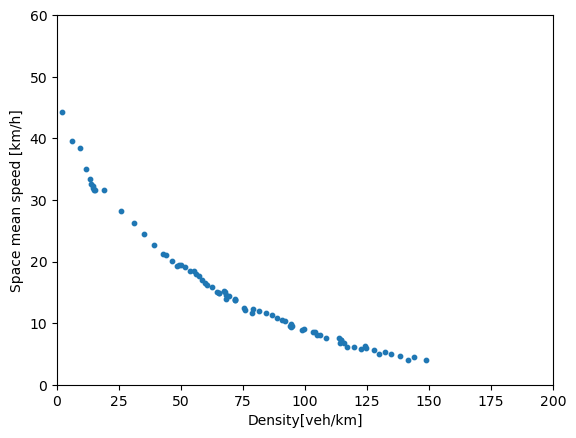

In [13]:

number_link_int = []
number_link_str = []

L = 5/1000
Ld = 2/1000

for index in edges.index:
    
    number_link_int.append(int(index))
    number_link_str.append(str(index))

number_lane = edges.loc[number_link_int, "Number of lanes"].to_numpy()
length_lane = edges.loc[number_link_int, "Length (m)"].to_numpy()


occupancy_region = occupancy[number_link_str].to_numpy() 

number_lane = np.diag(number_lane)


density = (occupancy_region/100)@np.transpose(number_lane)/(Ld + L)



flow_region = flow[number_link_str].to_numpy()*3600/90



link_speed = flow_region@np.transpose(density)



length_lane = np.tile(length_lane, (length_lane.shape[0], 1))


mean_speed = np.sum(flow_region@length_lane, axis=1)/np.sum(density@length_lane, axis=1)


average_density = np.mean(density,axis=1)

plt.scatter(average_density, mean_speed, s=10)   

plt.xlabel("Density[veh/km]")
plt.ylabel("Space mean speed [km/h]")
plt.xlim(0, 200)
plt.ylim(0,60)  
plt.show()

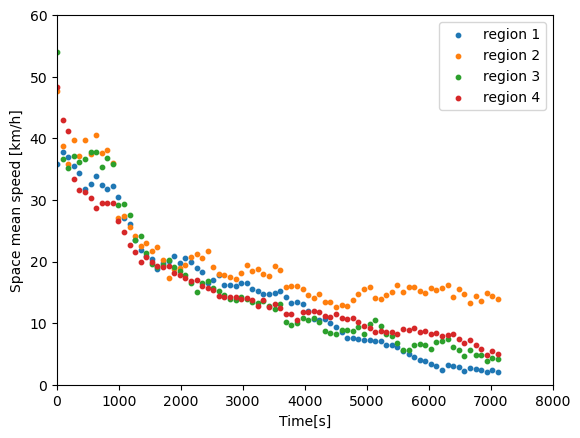

In [14]:
Region = [1,2,3,4]

t = np.arange(0,80)*90
for region in Region:


    number_link_int = []
    number_link_str = []

    L = 5/1000
    Ld = 2/1000

    for index in edges.index:
        if edges.loc[index]["Region"] == region:
            number_link_int.append(int(index))
            number_link_str.append(str(index))

    number_lane = edges.loc[number_link_int, "Number of lanes"].to_numpy()
    length_lane = edges.loc[number_link_int, "Length (m)"].to_numpy()


    occupancy_region = occupancy[number_link_str].to_numpy() 
    
    number_lane = np.diag(number_lane)


    density = (occupancy_region/100)@np.transpose(number_lane)/(Ld + L)

    flow_region = flow[number_link_str].to_numpy()*3600/90


    link_speed = flow_region@np.transpose(density)


    length_lane = np.tile(length_lane, (length_lane.shape[0], 1))


    mean_speed = np.sum(flow_region@length_lane, axis=1)/np.sum(density@length_lane, axis=1)

    average_density = np.mean(density,axis=1)

    plt.scatter(t, mean_speed, label=f'region {region}', s=10)   
    
plt.ylabel("Space mean speed [km/h]")
plt.xlabel("Time[s]")
plt.xlim(0, 8000)
plt.ylim(0,60)  
   
plt.legend()    
plt.show()

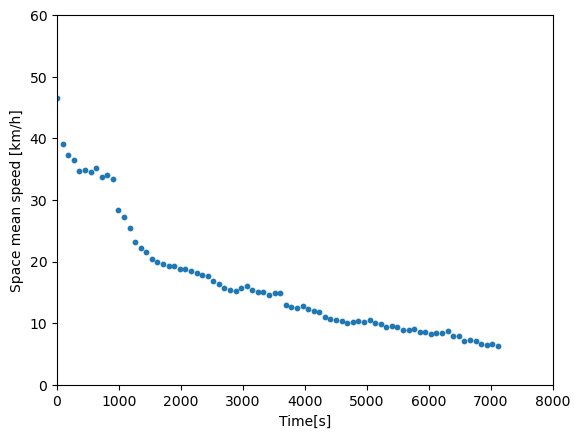

In [15]:
Region = [1,2,3,4]

t = np.arange(0,80)*90

mean_speed_mean = [[],[],[],[]]

for region in Region:


    number_link_int = []
    number_link_str = []

    L = 5/1000
    Ld = 2/1000

    for index in edges.index:
        if edges.loc[index]["Region"] == region:
            number_link_int.append(int(index))
            number_link_str.append(str(index))

    number_lane = edges.loc[number_link_int, "Number of lanes"].to_numpy()
    length_lane = edges.loc[number_link_int, "Length (m)"].to_numpy()


    occupancy_region = occupancy[number_link_str].to_numpy()
    number_lane = np.diag(number_lane)

    density = (occupancy_region/100)@np.transpose(number_lane)/(Ld + L)



    flow_region = flow[number_link_str].to_numpy()*3600/90


    link_speed = flow_region@np.transpose(density)


    length_lane = np.tile(length_lane, (length_lane.shape[0], 1))


    mean_speed = np.sum(flow_region@length_lane, axis=1)/np.sum(density@length_lane, axis=1)

 
    mean_speed_mean[region-1] = mean_speed

mean_speed_mean = np.array(mean_speed_mean)

mean_speed_mean = np.mean(mean_speed_mean, axis=0)


plt.ylabel("Space mean speed [km/h]")
plt.xlabel("Time[s]")
plt.xlim(0, 8000)
plt.ylim(0,60)  
   
plt.scatter(t, mean_speed_mean, s =10)       
plt.show()

## Step 4

In [16]:
def density_link(link, edges):
    L = 5/1000
    Ld = 2/1000
    number_lane = edges.loc[link, "Number of lanes"]
    occupancy_link = occupancy[str(link)] #%
    density = occupancy_link / 100 * number_lane / (L + Ld)
    return density

def accumulation_link(link):
    length = edges.loc[link, "Length (m)"]
    density = density_link(link)
    accumulation = length * density
    return accumulation
    
def production_link(link):
    length = edges.loc[link, "Length (m)"]
    volume = flow.loc[:, f'{link}'] * 3600 / 90 # Same volume as in part 2
    production = volume * length
    return production

def accumulation_2links(links):
    accumulations = []

    for link in links:
        acc = accumulation_link(link)
        accumulations.append(acc.to_numpy())

    return accumulations

def production_2links(links):
    productions = []

    for link in links:
        prod = production_link(link)
        productions.append(prod.to_numpy())
    
    return productions

def accumulation_region(region):
    accumulations = []
    links = []

    for index in edges.index:
        if edges.loc[index]["Region"] == region:
            links.append(int(index))

    for link in links:
        acc = accumulation_link(link)
        accumulations.append(acc.to_numpy())

    return accumulations  

def production_region(region):
    productions = []
    links = []

    for index in edges.index:
        if edges.loc[index]["Region"] == region:
            links.append(int(index))

    for link in links:
        prod = production_link(link)
        productions.append(prod.to_numpy())
        
    return productions 


4.1 - Single link

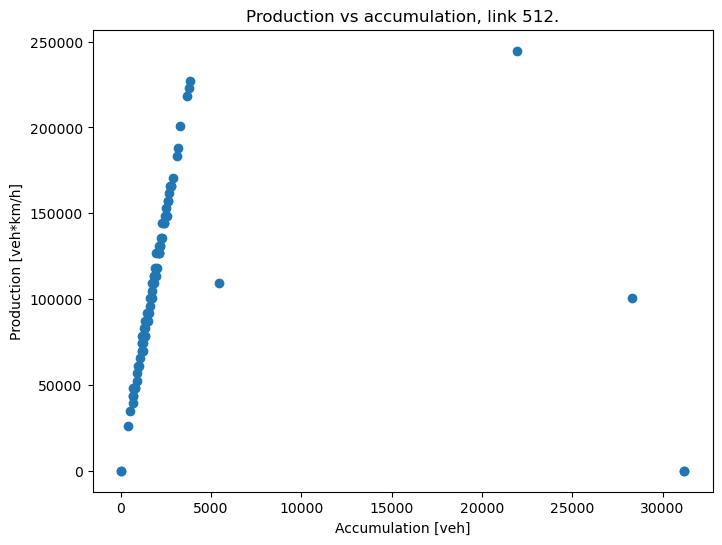

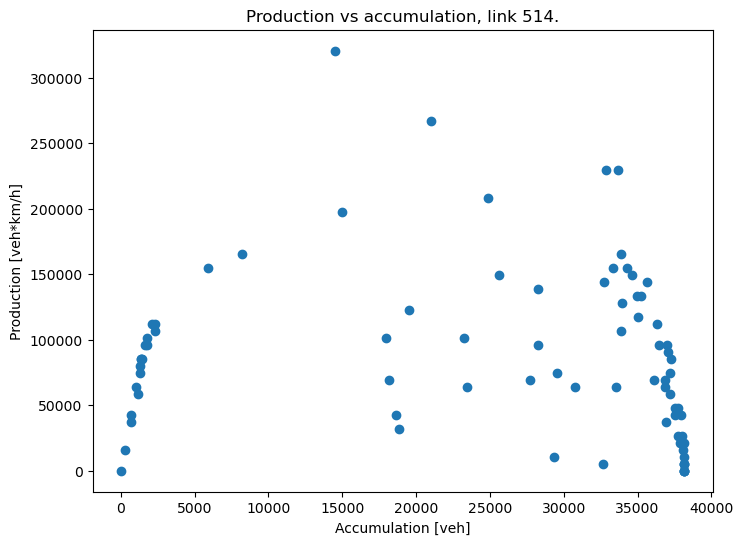

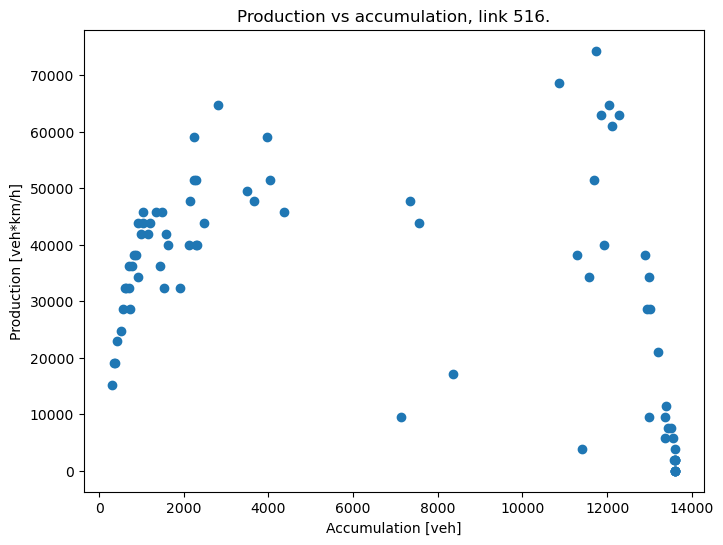

In [17]:
links = [512, 514, 516]

for link in links:
    plt.figure(figsize=(8,6))
    plt.title(f'Production vs accumulation, link {link}.')
    plt.scatter(accumulation_link(link), production_link(link))
    plt.xlabel('Accumulation [veh]')
    plt.ylabel('Production [veh*km/h]')
    plt.show()

4.2 - Two links

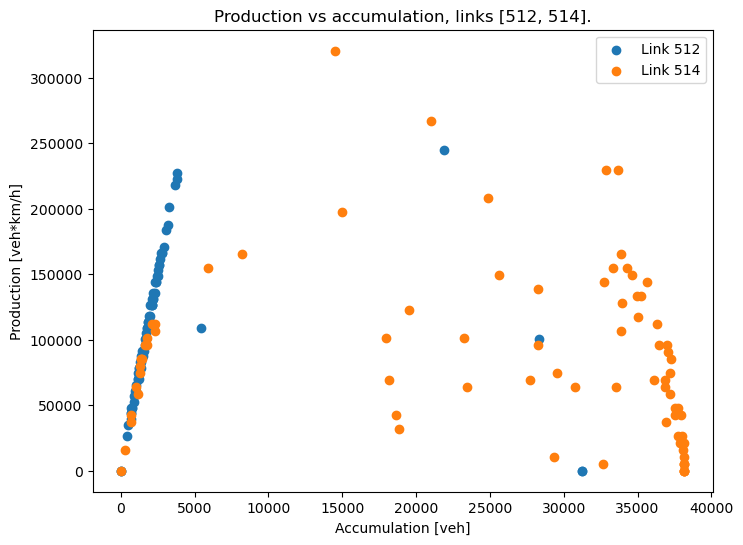

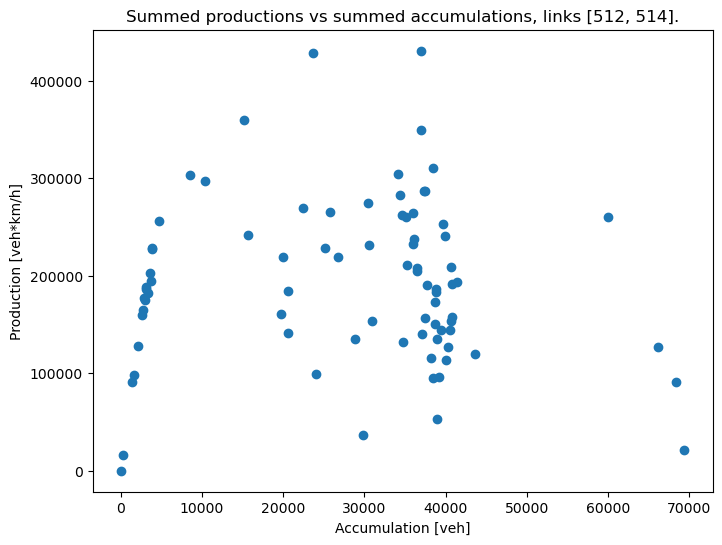

In [18]:
links = [512, 514]

accumulations = []
productions = []

summed_accumulations = []
summed_productions = []

accumulations = accumulation_2links(links)
productions = production_2links(links)

summed_accumulations = np.sum(accumulations, axis = 0)
summed_productions = np.sum(productions, axis = 0)


plt.figure(figsize=(8,6))
plt.title(f'Production vs accumulation, links {links}.')
for i in range(len(links)):
    plt.scatter(accumulations[i], productions[i], label = f'Link {links[i]}')
plt.xlabel('Accumulation [veh]')
plt.ylabel('Production [veh*km/h]')
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
plt.title(f'Summed productions vs summed accumulations, links {links}.')
plt.scatter(summed_accumulations, summed_productions)
plt.xlabel('Accumulation [veh]')
plt.ylabel('Production [veh*km/h]')
plt.show()

4.3 - All regions

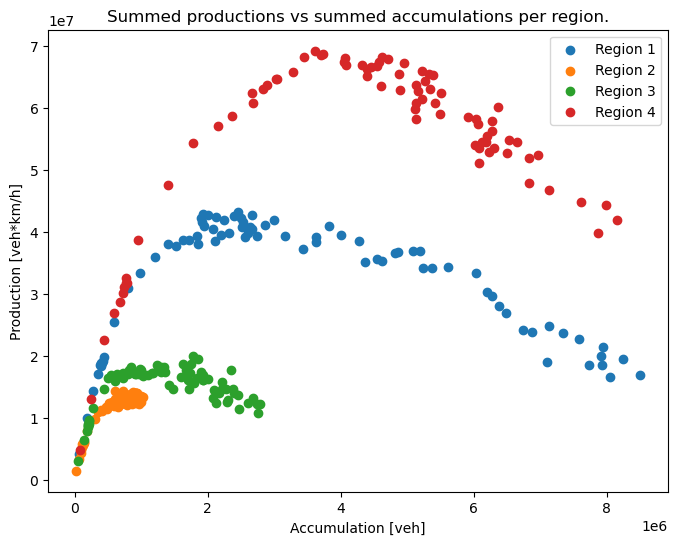

In [19]:
regions = [1,2,3,4]

plt.figure(figsize=(8,6))
plt.title(f'Summed productions vs summed accumulations per region.')

for region in regions:
    summed_accumulations = np.sum(accumulation_region(region), axis = 0)
    summed_productions = np.sum(production_region(region), axis = 0)
    plt.scatter(summed_accumulations, summed_productions, label = f"Region {region}")

plt.xlabel('Accumulation [veh]')
plt.ylabel('Production [veh*km/h]')
plt.legend()
plt.show()

## Step 5

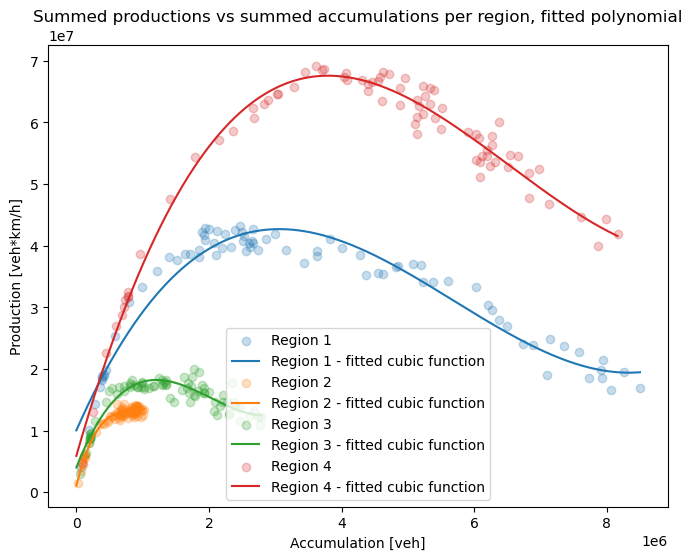

In [122]:
regions = [1,2,3,4]
summed_accumulations = {}
summed_productions = {}
polyfit = {}
for region in regions:
    summed_accumulations[region] = np.sum(accumulation_region(region), axis = 0)
    summed_productions[region] = np.sum(production_region(region), axis = 0)

#Est-ce que je peux sum les accumulations et productions ?



plt.figure(figsize=(8,6))
plt.title(f'Summed productions vs summed accumulations per region, fitted polynomial')

for region in regions:
    summed_accumulations[region] = np.sum(accumulation_region(region), axis = 0)
    summed_productions[region] = np.sum(production_region(region), axis = 0)
    polyfit[region] = np.polyfit(summed_accumulations[region], summed_productions[region], 3)

    xx = np.linspace(0, max(summed_accumulations[region]), 2001)
    plt.scatter(summed_accumulations[region], summed_productions[region], label = f"Region {region}", alpha=0.25)
    plt.plot(xx, np.polyval(polyfit[region], xx), label = f"Region {region} - fitted cubic function")

plt.xlabel('Accumulation [veh]')
plt.ylabel('Production [veh*km/h]')
#plt.ylim([0, round(max(map(max, summed_productions.values()))*1.1)])
plt.legend()
plt.show()

In [59]:
[print(f"Region {r} : ", np.polynomial.Polynomial(polyfit[r][::-1])) for r in regions]
[print(polyfit[r]) for r in regions]

Region 1 :  10036599.89528465 + 24.31229126 x - (5.43221721e-06) x**2 +
(3.17924639e-13) x**3
Region 2 :  1051055.12373312 + 42.36356182 x - (5.05273822e-05) x**2 +
(2.05214568e-11) x**3
Region 3 :  4006526.0149038 + 27.44483801 x - (1.62115147e-05) x**2 +
(2.67381788e-12) x**3
Region 4 :  5891287.08841401 + 37.63671491 x - (6.99029502e-06) x**2 +
(3.57060232e-13) x**3
[ 3.17924639e-13 -5.43221721e-06  2.43122913e+01  1.00365999e+07]
[ 2.05214568e-11 -5.05273822e-05  4.23635618e+01  1.05105512e+06]
[ 2.67381788e-12 -1.62115147e-05  2.74448380e+01  4.00652601e+06]
[ 3.57060232e-13 -6.99029502e-06  3.76367149e+01  5.89128709e+06]


[None, None, None, None]

In [155]:
def accumulation_sample(region, edges_sample):
    accumulations = []
    links = []

    for index in edges_sample.index:
        if edges_sample.loc[index]["Region"] == region:
            links.append(int(index))

    for link in links:
        acc = accumulation_link(link)
        accumulations.append(acc.to_numpy())

    return accumulations

def production_sample(region, edges_sample):
    productions = []
    links = []

    for index in edges_sample.index:
        if edges_sample.loc[index]["Region"] == region:
            links.append(int(index))

    for link in links:
        prod = production_link(link)
        productions.append(prod.to_numpy())
        
    return productions 

def plot_sample(edges_sample, title = f'Summed productions vs summed accumulations per region (sample), fitted polynomial'):
    regions = [1,2,3,4]
    summed_accumulations = {}
    summed_productions = {}
    polyfit = {}
    summed_accumulations_sample = {}
    summed_productions_sample = {}
    polyfit_sample = {}

    
    scales = (edges.groupby("Region")["Length (m)"].sum() / edges_sample.groupby("Region")["Length (m)"].sum())

    plt.figure(figsize=(8,8))
    plt.title(title)

    for region in regions:
        summed_accumulations[region] = np.sum(accumulation_region(region), axis = 0)
        summed_productions[region] = np.sum(production_region(region), axis = 0)
        summed_accumulations_sample[region] = np.sum(accumulation_sample(region, edges_sample), axis = 0) * scales[region]
        summed_productions_sample[region] = np.sum(production_sample(region, edges_sample), axis = 0) * scales[region]
        polyfit[region] = np.polyfit(summed_accumulations[region], summed_productions[region], 3)
        polyfit_sample[region] = np.polyfit(summed_accumulations_sample[region], summed_productions_sample[region], 3)


        xx = np.linspace(0, max(summed_accumulations_sample[region]), 2001)
        plt.scatter(summed_accumulations[region], summed_productions[region], label = f"Unsampled" if region==1 else None, color="grey", alpha=0.05)
        plt.scatter(summed_accumulations_sample[region], summed_productions_sample[region], label = f"Region {region}, sampled", alpha=0.25)
        plt.plot(xx, np.polyval(polyfit[region], xx), label = f"Unsampled" if region==1 else None, color="grey", alpha=0.25)
        plt.plot(xx, np.polyval(polyfit_sample[region], xx), label = f"Region {region}, sampled - fitted cubic function")

    plt.xlabel('Accumulation [veh]')
    plt.ylabel('Production [veh*km/h]')
    #plt.ylim([0, round(max(map(max, summed_productions.values()))*1.1)])
    plt.legend()
    plt.show()

    return polyfit_sample

def plot_sample_per_region(edges_sample, title = f'Summed productions vs summed accumulations per region (sample), fitted polynomial'):
    regions = [1,2,3,4]
    summed_accumulations = {}
    summed_productions = {}
    polyfit = {}
    summed_accumulations_sample = {}
    summed_productions_sample = {}
    polyfit_sample = {}

    scales = (edges.groupby("Region")["Length (m)"].sum() / edges_sample.groupby("Region")["Length (m)"].sum())


    for region in regions:
        plt.figure(figsize=(8,8))
        plt.title(title + " " + f"(Region {region})")

        summed_accumulations[region] = np.sum(accumulation_region(region), axis = 0)
        summed_productions[region] = np.sum(production_region(region), axis = 0)
        summed_accumulations_sample[region] = np.sum(accumulation_sample(region, edges_sample), axis = 0) * scales[region]
        summed_productions_sample[region] = np.sum(production_sample(region, edges_sample), axis = 0) * scales[region]
        polyfit[region] = np.polyfit(summed_accumulations[region], summed_productions[region], 3)
        polyfit_sample[region] = np.polyfit(summed_accumulations_sample[region], summed_productions_sample[region], 3)

        xx = np.linspace(0, max(summed_accumulations_sample[region]), 2001)
        plt.scatter(summed_accumulations[region], summed_productions[region], label = f"Unsampled" if region==1 else None, color="grey", alpha=0.05)
        plt.scatter(summed_accumulations_sample[region], summed_productions_sample[region], label = f"Region {region}, sampled", alpha=0.25)
        plt.plot(xx, np.polyval(polyfit[region], xx), label = f"Unsampled - fitted cubic function" if region==1 else None, color="grey", alpha=0.25)
        plt.plot(xx, np.polyval(polyfit_sample[region], xx), label = f"Region {region}, sampled - fitted cubic function")

        plt.xlabel('Accumulation [veh]')
        plt.ylabel('Production [veh*km/h]')
        #plt.ylim([0, round(max(map(max, summed_productions.values()))*1.1)])
        plt.legend()
        plt.show()


### Strategy 1 : Use links with the highest number of lanes

In [158]:
edges_sorted = edges.sort_values(by=["Region", "Number of lanes"], ascending=False)
edges_strategy_1 = edges_sorted.groupby("Region").apply(lambda x: x.head(len(x)//2))
edges_strategy_1.index = edges_strategy_1.index.get_level_values(1)
edges_strategy_1

,Length (m),Number of lanes,Starting node ID,Ending node ID,Region
Link ID,,,,,
8144,71.272341,6,41937,40633,1
8145,106.491211,6,40636,46937,1
8338,18.683581,6,41892,41895,1
10199,120.597656,6,40633,46925,1
10201,97.848633,6,46925,46931,1
...,...,...,...,...,...
9857,126.513302,3,21171,45518,4
9859,136.991974,3,21015,21036,4
9861,138.124942,3,44852,21036,4


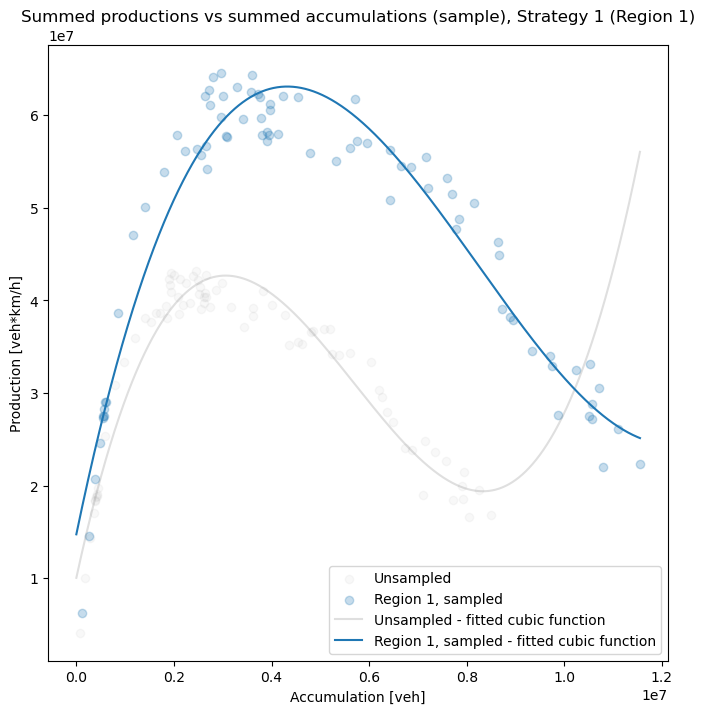

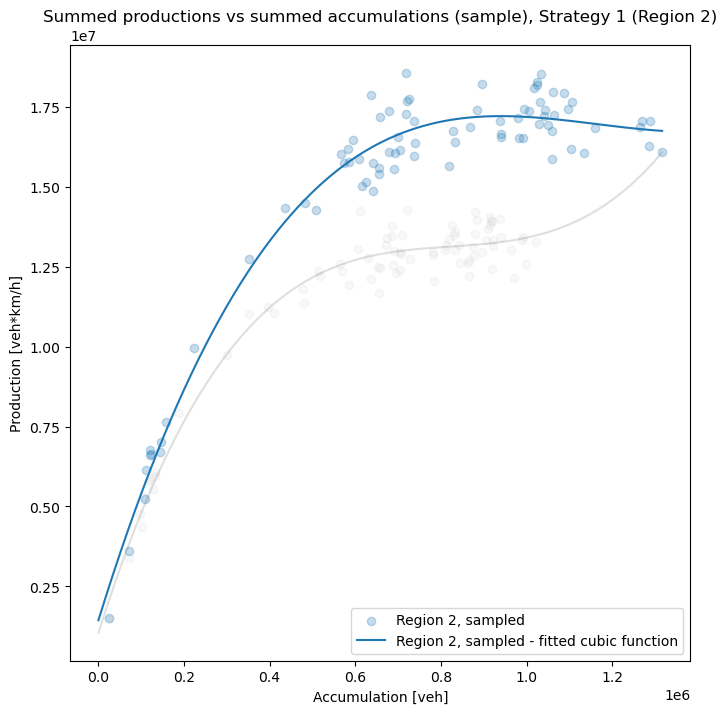

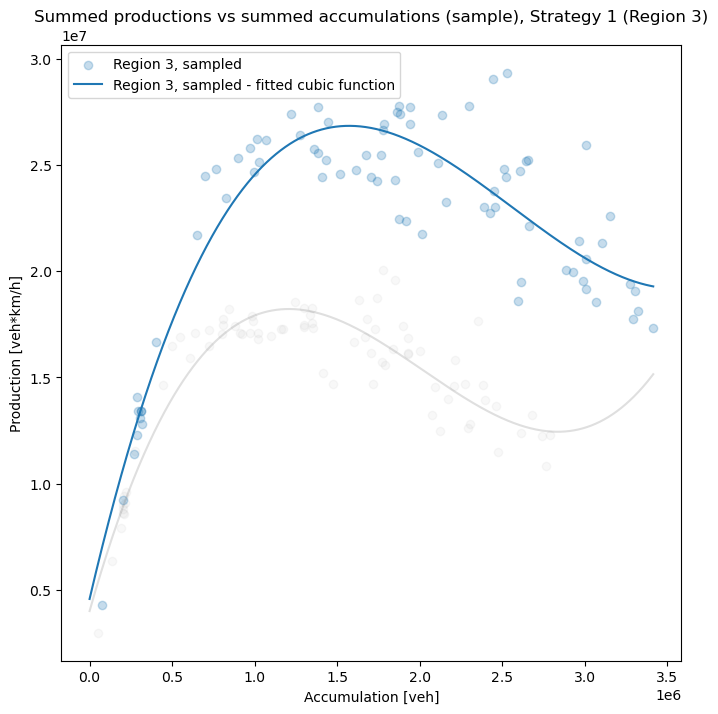

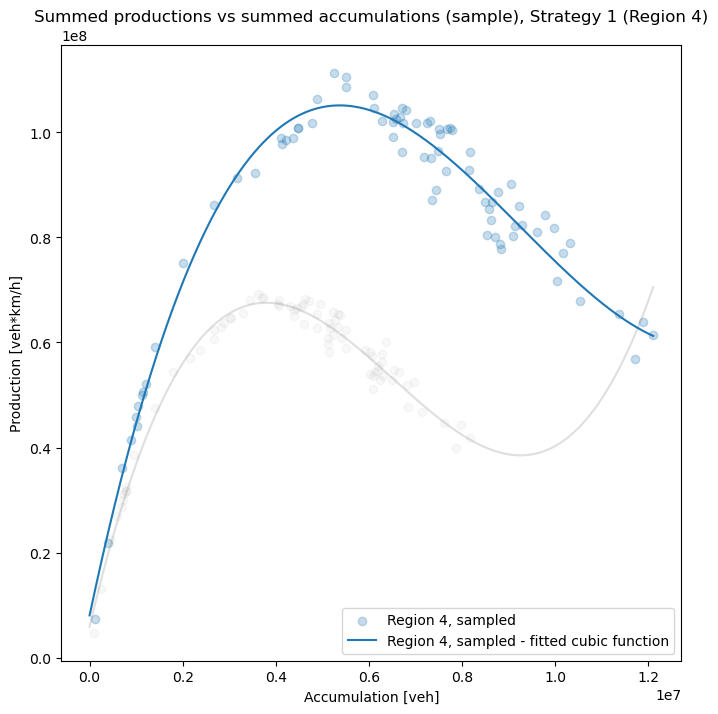

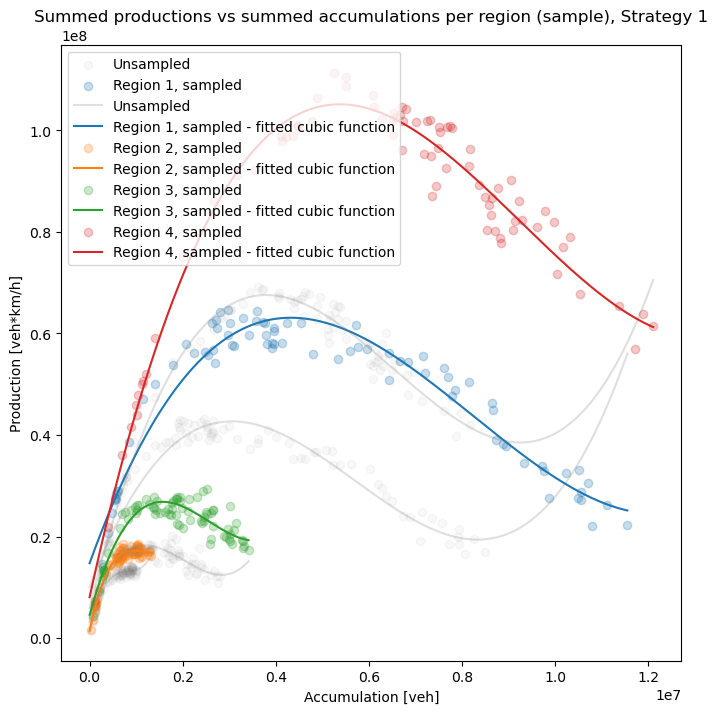

{1: array([ 1.61128171e-13, -3.98076489e-06,  2.53828110e+01,  1.47364586e+07]),
 2: array([ 1.11072099e-11, -3.87370427e-05,  4.33739706e+01,  1.44390846e+06]),
 3: array([ 1.98588144e-12, -1.52503302e-05,  3.32258780e+01,  4.57465352e+06]),
 4: array([ 1.98146372e-13, -5.49432165e-06,  4.18687082e+01,  8.05032096e+06])}

In [156]:
plot_sample_per_region(edges_strategy_1, "Summed productions vs summed accumulations (sample), Strategy 1")
plot_sample(edges_strategy_1, "Summed productions vs summed accumulations per region (sample), Strategy 1")

### Strategy 2 - Longest link length

In [164]:
edges_sorted = edges.sort_values(by=["Region", "Length (m)"], ascending=False)
edges_strategy_2 = edges_sorted.groupby("Region").apply(lambda x: x.head(len(x)//2))
edges_strategy_2.index = edges_strategy_2.index.get_level_values(1)
edges_strategy_2

,Length (m),Number of lanes,Starting node ID,Ending node ID,Region
Link ID,,,,,
10719,349.464538,2,41895,40,1
10718,348.648816,2,40,41895,1
9307,241.371093,1,46668,44563,1
17270,210.027714,3,23,20594,1
8348,201.831532,5,6,41950,1
...,...,...,...,...,...
9798,103.951255,2,45504,45312,4
9814,103.875000,2,45697,45524,4
10138,103.820551,2,21166,20988,4


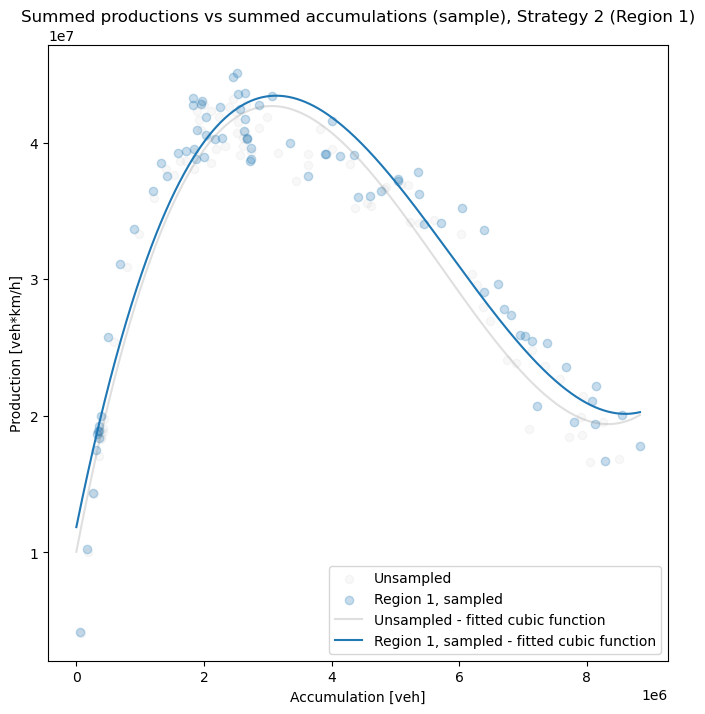

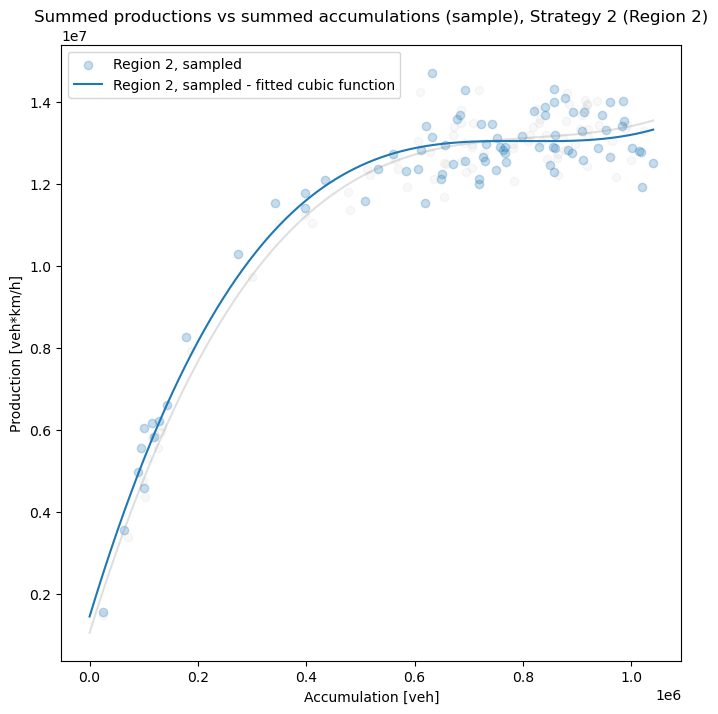

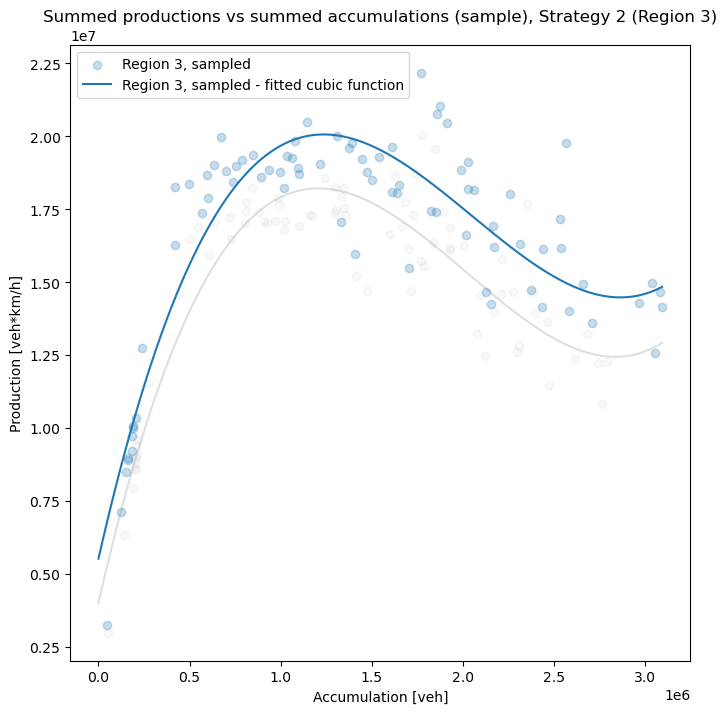

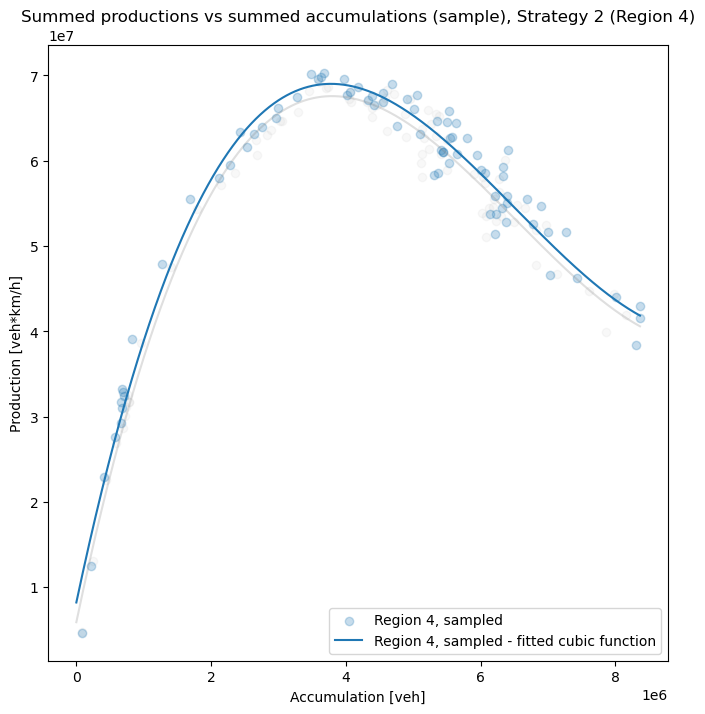

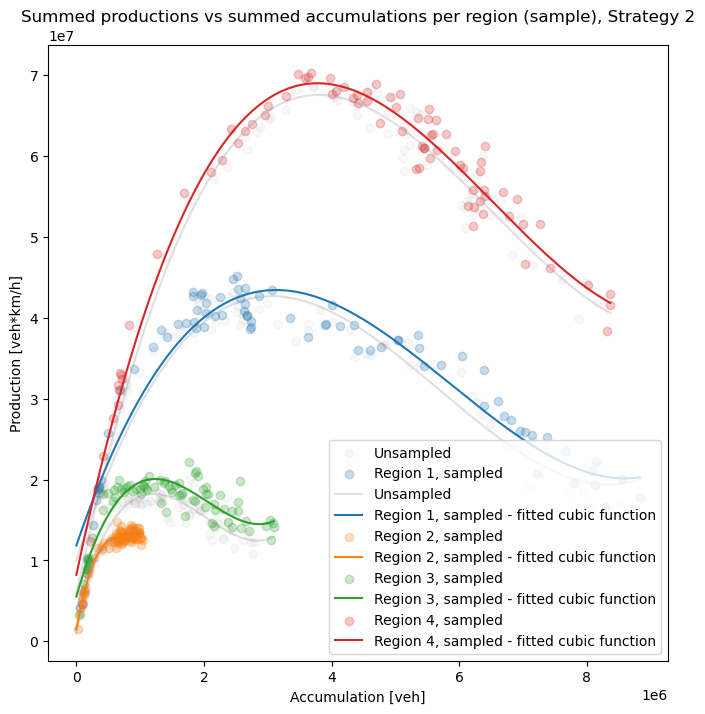

{1: array([ 2.84489629e-13, -5.00588644e-06,  2.29741335e+01,  1.18418848e+07]),
 2: array([ 2.24888763e-11, -5.42082463e-05,  4.34700785e+01,  1.44590111e+06]),
 3: array([ 2.58777472e-12, -1.59153310e-05,  2.74820326e+01,  5.52485058e+06]),
 4: array([ 3.55105848e-13, -6.94374062e-06,  3.72577130e+01,  8.20431074e+06])}

In [165]:
plot_sample_per_region(edges_strategy_2, "Summed productions vs summed accumulations (sample), Strategy 2")
plot_sample(edges_strategy_2, "Summed productions vs summed accumulations per region (sample), Strategy 2")

### Strategy 3 - Maximum average flow

In [180]:
average_flow = flow.mean().rename("Average flow")
average_flow.index = pd.to_numeric(average_flow.index)
edges_sorted = edges.merge(average_flow, right_index=True, left_index=True).sort_values(by=["Region", "Average flow"], ascending=False)
edges_strategy_3 = edges_sorted.groupby("Region").apply(lambda x: x.head(len(x)//2))
edges_strategy_3.index = edges_strategy_3.index.get_level_values(1)
edges_strategy_3

,Length (m),Number of lanes,Starting node ID,Ending node ID,Region,Average flow
Link ID,,,,,,
9863,37.024865,5,44416,40948,1,90.0375
9853,132.487748,5,44464,44416,1,78.9625
9629,114.562500,5,44510,44464,1,76.5500
9494,115.115723,5,45884,45891,1,68.5500
9496,112.990710,5,45891,45899,1,66.9375
...,...,...,...,...,...,...
3144,61.916024,3,21122,21109,4,18.1875
9488,108.685547,2,45853,45954,4,18.1625
513,129.668254,3,19067,21109,4,18.1375


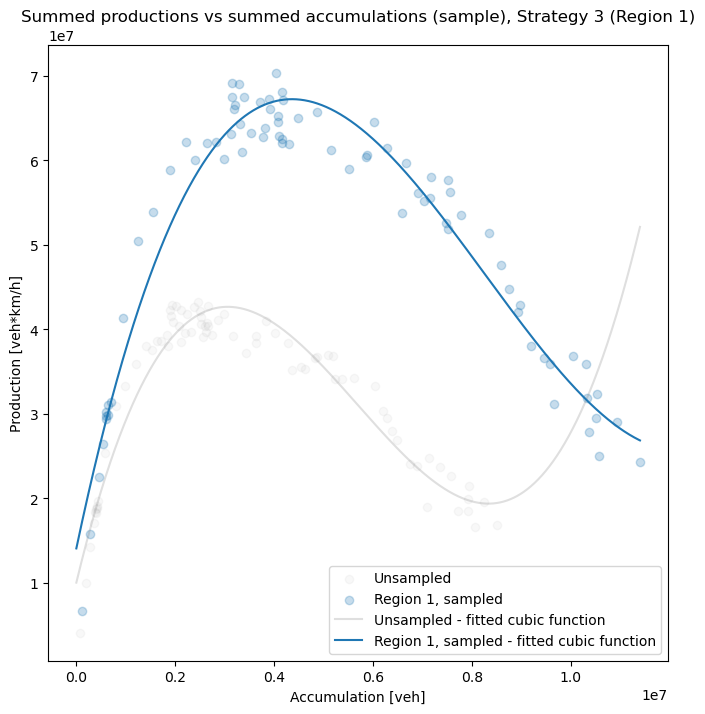

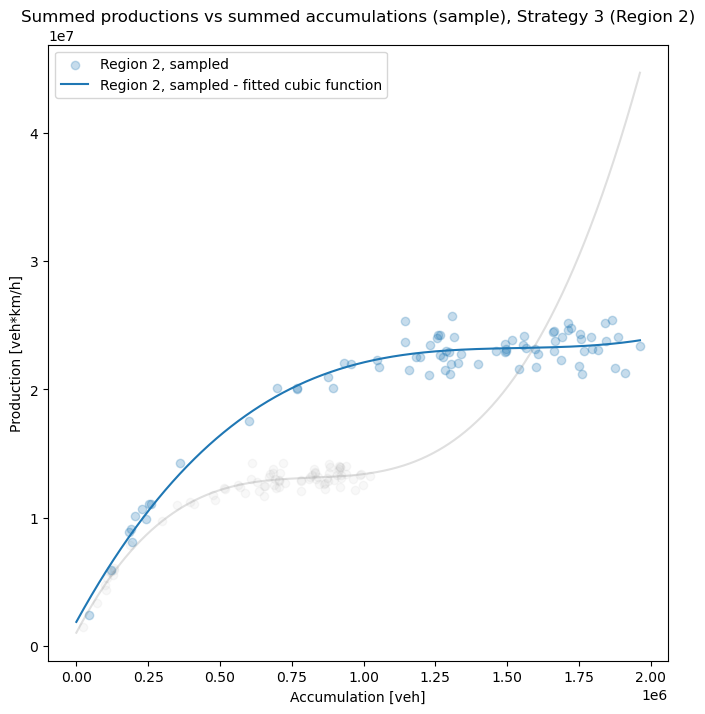

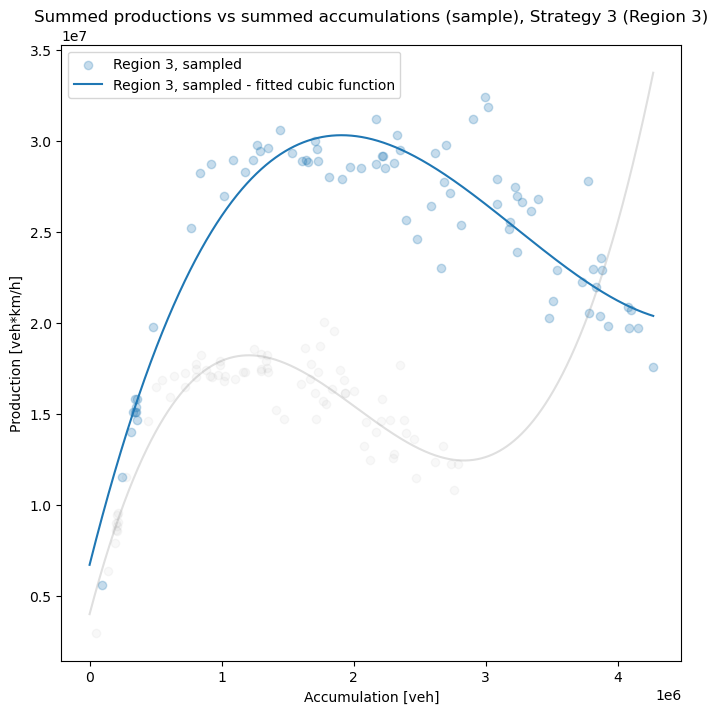

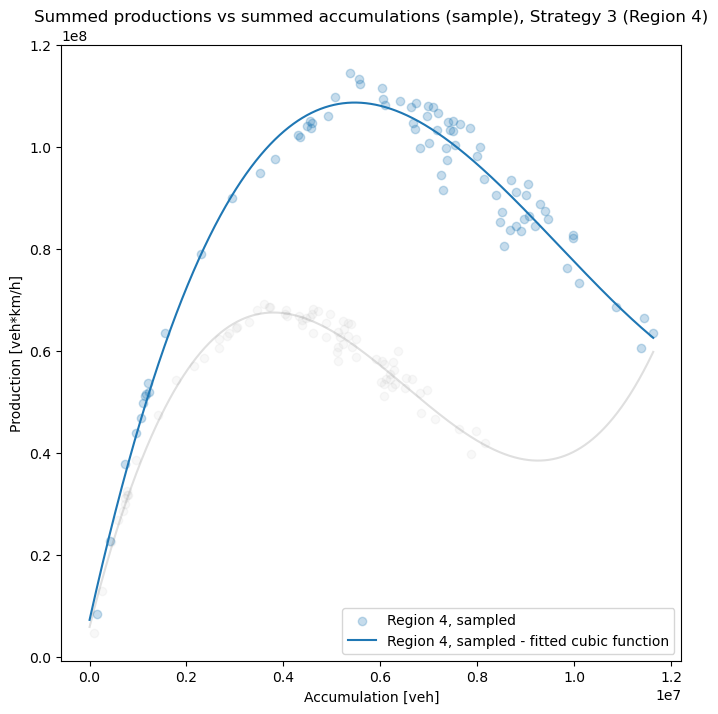

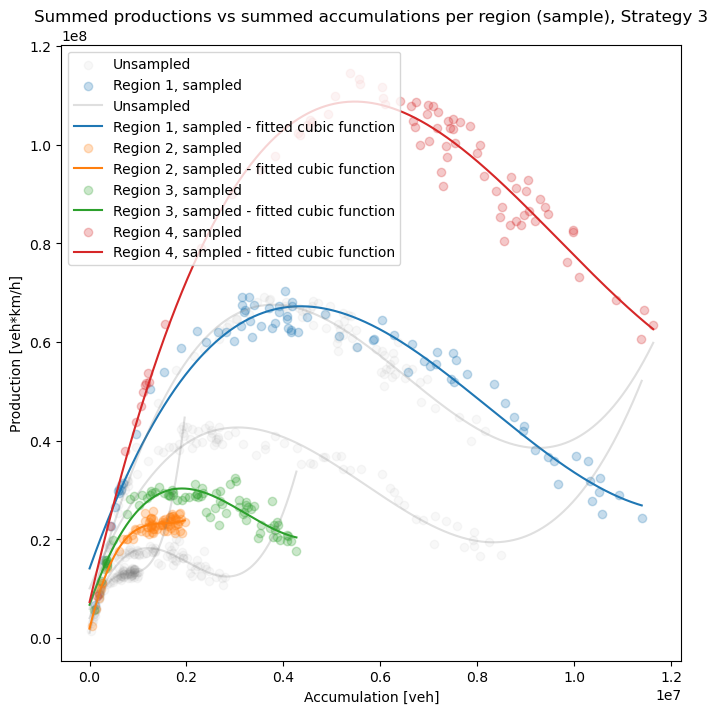

{1: array([ 1.73919812e-13, -4.31381002e-06,  2.76947092e+01,  1.40866675e+07]),
 2: array([ 5.65630587e-12, -2.61447606e-05,  4.07047727e+01,  1.89259775e+06]),
 3: array([ 1.10190928e-12, -1.06861271e-05,  2.87379878e+01,  6.71375022e+06]),
 4: array([ 1.86749227e-13, -5.43234864e-06,  4.26783484e+01,  7.27573367e+06])}

In [181]:
plot_sample_per_region(edges_strategy_3, "Summed productions vs summed accumulations (sample), Strategy 3")
plot_sample(edges_strategy_3, "Summed productions vs summed accumulations per region (sample), Strategy 3")